In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 27 01:47:03 2018

@author: rundo
"""

from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransform

data = Table.read('data_PASP&YSO_removed.fits')
PAH1 = Table.read('PAH_1.fits')
PAH2 = Table.read('PAH_2.fits')
AGN = Table.read('AGN.fits')
shock = Table.read('shock.fits')
PAHcon = Table.read('PAHcon.fits')
YSO = Table.read('YSO.fits')

sigma3 = np.sqrt(data['d4_5m']**2+data['d8_0m']**2)
sigma4 = np.sqrt(data['d3_6m']**2+data['d5_8m']**2)

In [4]:
x = data['mag4_5']-data['mag8_0']
y = data['mag3_6']-data['mag5_8']

YSOII_index = []

for i in range(0,len(data)):
    if x[i]-sigma3[i]>0.5:
        if y[i]-sigma4[i]>0.35:
            if y[i]+sigma4[i] <= (0.14/0.04)*(x[i]-sigma3[i]-0.5)+0.5:
                if data['mag3_6'][i]-data['mag4_5'][i]-sigma4[i]>0.15:
                    if data['d3_6m'][i]<0.2:
                        if data['d4_5m'][i]<0.2:
                            if data['d5_8m'][i]<0.2:
                                if data['d8_0m'][i]<0.2:
                                    YSOII_index.append(i)

In [7]:
#data[YSOII_index].write('YSOII.fits')
print(len(YSOII_index))

41371


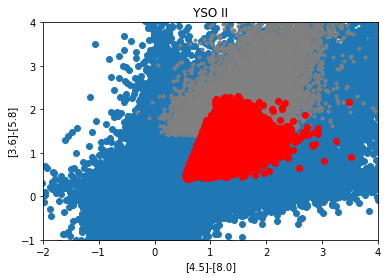

In [8]:
plt.scatter(x,y)

#plt.scatter(PAH1['__4_5_']-PAH1['__8_0_'],PAH1['__3_6_']-PAH1['__5_8_'],color='grey',marker='.')
#plt.scatter(PAH2['__4_5_']-PAH2['__8_0_'],PAH2['__3_6_']-PAH2['__5_8_'],color='grey',marker='.')
#plt.scatter(AGN['__4_5_']-AGN['__8_0_'],AGN['__3_6_']-AGN['__5_8_'],color='grey',marker='.')
#plt.scatter(shock['__4_5_']-shock['__8_0_'],shock['__3_6_']-shock['__5_8_'],color='grey',marker='.')
#plt.scatter(PAHcon['__4_5_']-PAHcon['__8_0_'],PAHcon['__3_6_']-PAHcon['__5_8_'],color='grey',marker='.')
plt.scatter(YSO['mag4_5']-YSO['mag8_0'],YSO['mag3_6']-YSO['mag5_8'],color='grey',marker='.')
plt.scatter(x[YSOII_index],y[YSOII_index],color='r')
plt.xlim(-2, 4)
plt.ylim(-1,4)

plt.xlabel('[4.5]-[8.0]')
plt.ylabel('[3.6]-[5.8]')

plt.title('YSO II')

data.remove_rows(YSOII_index)
data.write('phase1_final.fits')